In [1]:
%matplotlib inline

# ANOVA (Analysis of Variance)

ANOVA is a popular technique used by researcher to check if there exist difference in the mean of groups. For example, let's say that we conduct an experiment to find what is the best temperature needed to bake a delicious pizza. For this experiment, we will have 3 different temperature, low, medium and high. This kind of experiment is called as a one-way ANOVA because we only have 1 variable observed which is the temperature. The different in temperature is called as factor levels. So in our case, we have 3 levels for consideration. The backbone for ANOVA is the variance. What we're doing is actually to find out the variance between group and variance within group. Eventually we will use both variance in our calculation and will decide whether there exist significant different in the mean for each level. The test statistic will be calculated as follow:

$$ F-statistic = \frac{\sigma^2 between sample means}{\sigma^2 within the samples}$$

$$ F-statistic = \frac{r \sum{(\bar{X_i} - \bar{X})^2}}{\sum{\sum{(X_{ij} - \bar{X_i})^2}}}$$

$$ F-statistic = \frac{SSTr}{SSE}$$

where

r = # of sample for one level

SSTr = sum of squares explained by treatment

SSE = sum of squares of error unexplained by treatment

SSTr = SST - SSE such that SST = $\sum{\sum{(X_{ij} - \bar{X})^2}}$

For this simulation, I will use the Crustacean & Molluscs data from MysIDC as an example. This will be a one-way ANOVA because I will try to check if there exist a significant different in the quantity production given that we're looking at Crustacean & Molluscs food category. For this one category, we have 5 sub-categories which will be our factor level for this simulation. I will not check the condition/assumptions because this simulation is to emphasis on how ANOVA is conducted rather than to make this as a standard research paper.

Our null hypothesis will be the mean of quantity production is the same across sub-category. 

While our alternative hypothesis will be that there is at least one sub-category that have different mean.

In [2]:
import pandas as pd
import numpy as np

path = 'C:/Users/farea/Desktop/10.3.7 Production of Crustacean & Molluscs (Brackishwater Aquaculture) Malaysia 2000 - 2019_dataset.xlsx'

data = pd.read_excel(path)
data

,Category,Sub-Category,Year,Quantity ('000 Tonnes),Value (RM Million)
0,\nCrustacean & Molluscs,Cockle,2000,64.400,50.650
1,\nCrustacean & Molluscs,Cockle,2001,70.820,55.730
2,\nCrustacean & Molluscs,Cockle,2002,78.710,62.400
3,\nCrustacean & Molluscs,Cockle,2003,71.070,56.770
4,\nCrustacean & Molluscs,Cockle,2004,64.560,54.210
...,...,...,...,...,...
95,\nCrustacean & Molluscs,Shrimp,2015,58.000,1221.550
96,\nCrustacean & Molluscs,Shrimp,2016,43.253,918.632
97,\nCrustacean & Molluscs,Shrimp,2017,45.783,1067.337
98,\nCrustacean & Molluscs,Shrimp,2018,45.920,1114.950


In [3]:
data['Sub-Category'].unique()

array(['Cockle', 'Mussel', 'Oyster', 'Seaweed', 'Shrimp'], dtype=object)

If we use the one-way ANOVA from pingouin package, we'll obtain

In [4]:
import pingouin as pg

aov = pg.anova(data=data, dv="Quantity ('000 Tonnes)", between='Sub-Category', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Sub-Category,267474.451480,4,66868.612870,28.761301,1.157829e-15,0.547716
1,Within,220870.339971,95,2324.950947,NaN,NaN,NaN


And from this table, we get the F-statistic is so large and the p-value is so small which indicate that the null hypothesis should be rejected and there is at least a different between the mean of the sub-category.

Now I'll use the hard way (sampling distribution) and try to build our own f-distribution to see if we obtain a similar result with our ANOVA table.

In [5]:
data1 = data[(data['Sub-Category']=='Cockle')]
data2 = data[(data['Sub-Category']=='Mussel')]
data3 = data[(data['Sub-Category']=='Oyster')]
data4 = data[(data['Sub-Category']=='Seaweed')]
data5 = data[(data['Sub-Category']=='Shrimp')]

nsample=10000
test_data1 = pd.DataFrame(np.random.choice(data1["Quantity ('000 Tonnes)"], size=(nsample, 20)))
test_data2 = pd.DataFrame(np.random.choice(data2["Quantity ('000 Tonnes)"], size=(nsample, 20)))
test_data3 = pd.DataFrame(np.random.choice(data3["Quantity ('000 Tonnes)"], size=(nsample, 20)))
test_data4 = pd.DataFrame(np.random.choice(data4["Quantity ('000 Tonnes)"], size=(nsample, 20)))
test_data5 = pd.DataFrame(np.random.choice(data5["Quantity ('000 Tonnes)"], size=(nsample, 20)))

#calculating treatment average
mean_trt1 = np.mean(test_data1, axis=1)
mean_trt2 = np.mean(test_data2, axis=1)
mean_trt3 = np.mean(test_data3, axis=1)
mean_trt4 = np.mean(test_data4, axis=1)
mean_trt5 = np.mean(test_data5, axis=1)

#calculating total average
test_data = pd.concat([test_data1,test_data2,test_data3,test_data4,test_data5], axis=1)
mean_overall = np.mean(test_data, axis=1)

#calculating SSTr & MSTr (sum of squares treatment ~ sum((yibar - ybar)^2) )
sstr = 20*((mean_trt1 - mean_overall)**2 + (mean_trt2 - mean_overall)**2 + (mean_trt3 - mean_overall)**2 + (mean_trt4 - mean_overall)**2 + (mean_trt5 - mean_overall)**2)
mstr = sstr/(5-1) # each run have 5 sub-category.

#calculating SSE & MSE (sum of square error ~ sum((yi - yibar)^2) )
square_error1 = [(test_data1.iloc[:,i] - mean_trt1)**2 for i in range(20)]
square_error2 = [(test_data2.iloc[:,i] - mean_trt2)**2 for i in range(20)]
square_error3 = [(test_data3.iloc[:,i] - mean_trt3)**2 for i in range(20)]
square_error4 = [(test_data4.iloc[:,i] - mean_trt4)**2 for i in range(20)]
square_error5 = [(test_data5.iloc[:,i] - mean_trt5)**2 for i in range(20)]

square_error1 = pd.DataFrame(square_error1).T
square_error2 = pd.DataFrame(square_error2).T
square_error3 = pd.DataFrame(square_error3).T
square_error4 = pd.DataFrame(square_error4).T
square_error5 = pd.DataFrame(square_error5).T

sse = np.sum(square_error1, axis=1) + np.sum(square_error2, axis=1) + np.sum(square_error3, axis=1) + np.sum(square_error4, axis=1) + np.sum(square_error5, axis=1)
mse = sse/(100-5) # for 1 run, we have 100 data and 5 sub-category

f_stat = mstr/mse

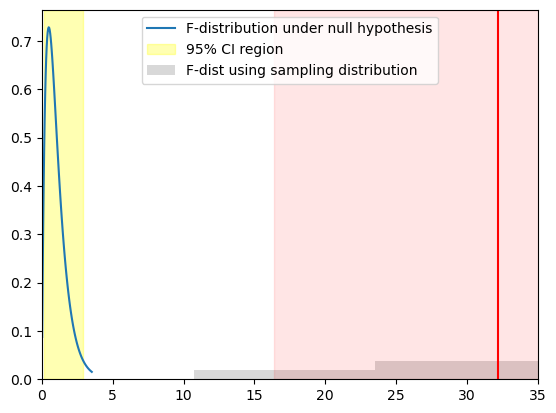

In [6]:
import matplotlib.pyplot as plt
from scipy.stats import f

dfn = 5-1
dfd = 100-5
x = np.linspace(f.ppf(0.001,dfn,dfd), f.ppf(0.99, dfn,dfd), 100)
rv = f(dfn,dfd)

fig, ax = plt.subplots()

ax.plot(x, rv.pdf(x), label='F-distribution under null hypothesis')
ax.axvspan(f.ppf(0.025,dfn,dfd), f.ppf(0.975, dfn,dfd), alpha=0.3, color='yellow', label='95% CI region')
ax.hist(f_stat, density=True, color='grey', alpha=0.3, label='F-dist using sampling distribution')
ax.axvspan(np.percentile(f_stat,2.5), np.percentile(f_stat,97.5), alpha=0.1, color='red')
ax.axvline(np.mean(f_stat), color='red')
ax.set_xlim([0,35])
plt.legend()

In [8]:
np.mean(mstr), np.mean(mse), np.mean(f_stat)

(69185.98660509633, 2209.9599589343225, 32.218232196834265)

And we still get the same result which is to reject the null hypothesis.

If you are using the scipy.stats, the one-way ANOVA test can be found under the f_oneway method. 

Usually after reporting that there is difference between the mean of the group/level, researcher will further their analysis by doing posthoc analysis. You can think of it as an act to drill down further to know which group/level is responsible to cause the difference and how much is the effect size. When doing posthoc analysis, adjustment need to be done to control the familywise error rate (error cause by too many comparison testing between two groups/levels).